In [ ]:
#Ukraine-Russian War Twitter Sentiment Analysis

In [1]:
#--Importing the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re #--Regular Expression Library
import nltk #--NLP package
import string #--To work with strings porperly
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator #--Viz for texts
from nltk.corpus import stopwords

sns.set_theme(context = 'paper', style = 'whitegrid', palette = 'pastel')

In [2]:
#--Loading the dataset
df = pd.read_csv('E:/Downloads/DataSets/russia-ukraine.csv')
df.head()

In [8]:
#--Looking at the columns in the dataset 
df.columns

Index(['username', 'tweet', 'language'], dtype='object')

In [7]:
#--Re-defining our dataset using only columns of need
df = df[['username','tweet','language']]

In [9]:
df.isnull().sum()

username    0
tweet       0
language    0
dtype: int64

In [10]:
#--Value counts of various languages used
df['language'].value_counts()

en     8668
pt      417
it      271
qme     120
und      83
in       75
ru       55
es       46
fr       33
fi       29
ca       29
ar       25
ja       24
de       16
th       15
nl       15
ro       13
el       12
pl       11
sv        8
sl        6
uk        5
tl        4
vi        4
et        4
zh        4
qht       3
fa        2
qam       2
hi        2
tr        2
zxx       2
no        2
da        1
is        1
ne        1
cy        1
cs        1
Name: language, dtype: int64

<span style='font-family:Century SchoolBook'> Here we are focusing on the <b>English</b> language since it has the maximum no. of tweets, we will first remove the stopwords and then focus on replacing the stuff we dont need to analyse only to get the main words of interest </span>

In [11]:
nltk.download('stopwords') #--Words that are basically ignored such as 'as','am','the'
stemmer = nltk.SnowballStemmer("english") #--Gets rid of the extras in a string , such as cared --> care etc
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text) #--replacing first with the 'text'
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
df["tweet"] = df["tweet"].apply(clean)

[nltk_data] Downloading package stopwords to C:\Users\Subhash
[nltk_data]     Ranga\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
C:\Users\Subhash Ranga\AppData\Local\Temp\ipykernel_5296\625155763.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tweet"] = df["tweet"].apply(clean)


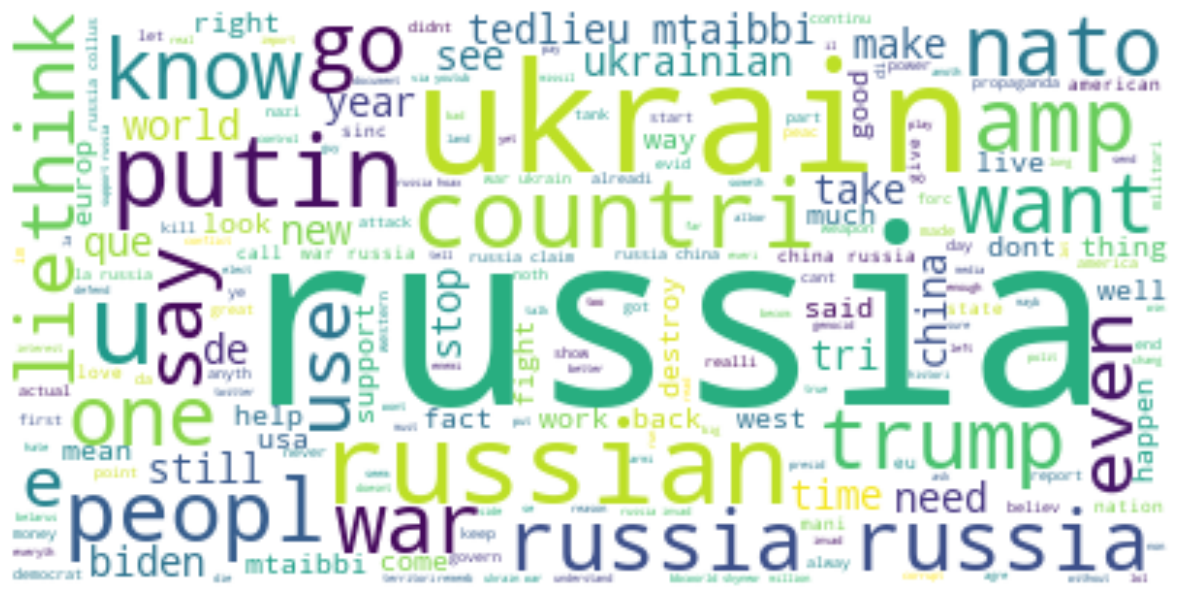

In [13]:
#--Viz all the text words present
text = " ".join(i for i in df.tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off") #--Removing the axis
plt.show()

<span style='font-family:Century Schoolbook'> We are dividing our tweets based on their polarity score.
<br>
<b>Polarity score</b> is a concept of NLP which a Python dictionary of sentiment scores: how negative the sentence is between 0-1, how neutral the sentence is between 0-1, how positive the sentence is between 0-1, as well as a compound score between -1-1. </span>

In [14]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["tweet"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["tweet"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["tweet"]]
df = df[["tweet", "Positive", "Negative", "Neutral"]]
print(df.head())

[nltk_data] Downloading package vader_lexicon to C:\Users\Subhash
[nltk_data]     Ranga\AppData\Roaming\nltk_data...


                                               tweet  Positive  Negative  \
0   buy middl east norway russia venezuela usa  k...     0.117     0.000   
1  allow  leader leader usa russia china franc br...     0.293     0.208   
2   mtaibbi wouldv invas us negoti good faith amp...     0.270     0.102   
3  😊🇷🇺anoth good putin pictur  ukrain ukrainewar ...     0.244     0.000   
4  drsyedhaid true anoth analog russia friend us ...     0.280     0.309   

   Neutral  
0    0.883  
1    0.499  
2    0.628  
3    0.756  
4    0.411  


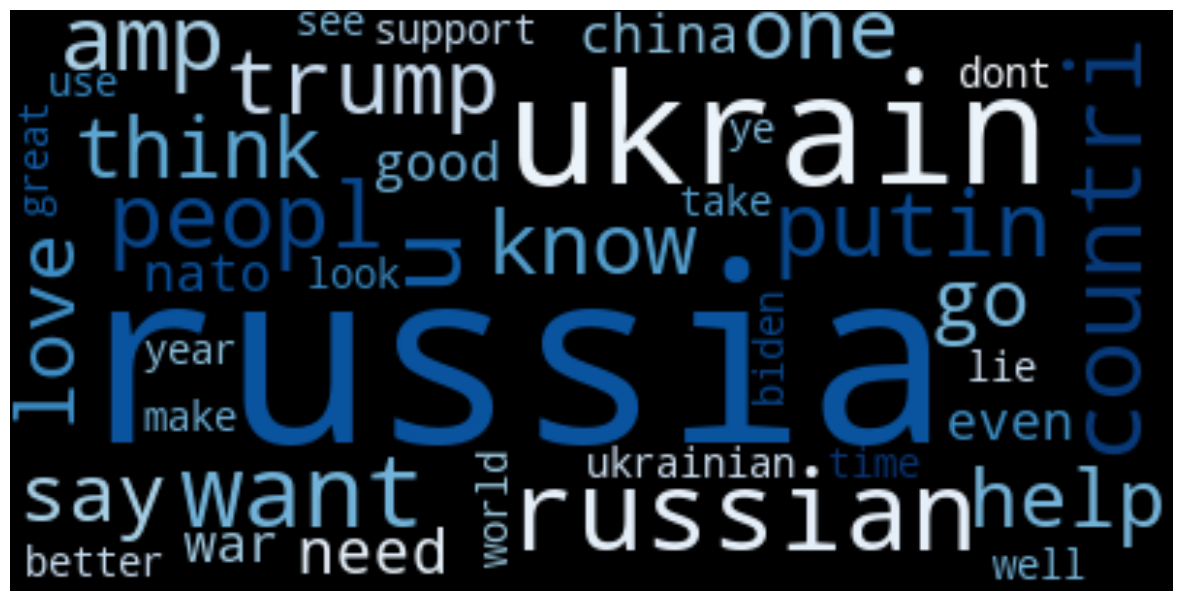

In [24]:
#--Viz the Postitive Words
positive =' '.join([i for i in df['tweet'][df['Positive'] > df["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black",colormap = 'Blues',max_words =40).generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

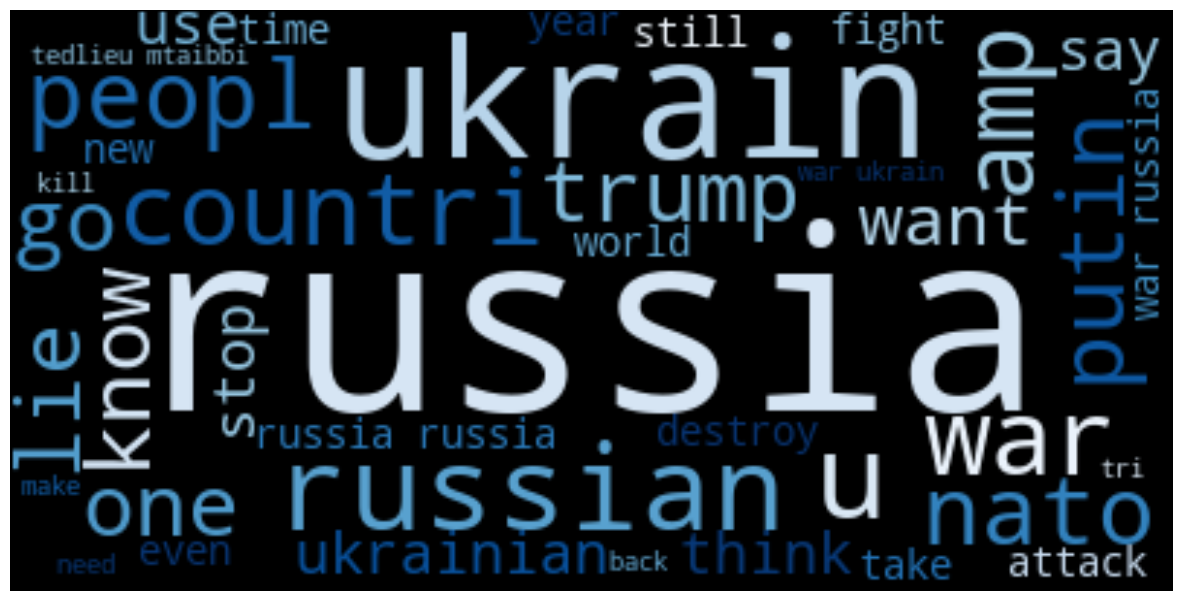

In [27]:
#--Vizualising the Negative words
negative =' '.join([i for i in df['tweet'][df['Negative'] > df["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="black", colormap='Blues',max_words = 40).generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()